In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os
import warnings
import math
import copy
warnings.filterwarnings('ignore')
%matplotlib inline

plt.style.use('ggplot')
mpl.rcParams['axes.unicode_minus']=False
# 폰트 설정
mpl.rc('font', family='Malgun Gothic')
# 유니코드에서  음수 부호설정
mpl.rc('axes', unicode_minus=False)

In [379]:
rental_data=pd.read_csv('C:/Users/user/Desktop/서울시청/데이터/독립변수/최종독립변수(변환후).csv',encoding='cp949')

In [380]:
rental_data.columns

Index(['대여소번호', 'subway', 'park', '상업지역', 'weighted_LEN_mean', 'mean_width',
       '주거', 'school', 'sports', 'adult', 'study', 'market', 'game', 'house',
       'culture', 'hell', 'parking', 'bike', 'bus_dis', 'bus_all', 'sub_all',
       '건축면적', '건폐율', '공시지가', '지하층수', '용적율', '높이', '연면적', '지상층수', '대지면적', '인구',
       'starbucks', 'PB', 'count'],
      dtype='object')

In [381]:
rental_data['starbucks']=rental_data['starbucks'].astype('category')
rental_data['PB']=rental_data['PB'].astype('category')
rental_data['상업지역']=rental_data['상업지역'].astype('category')

In [382]:
rental_data=rental_data[[ 'subway',  '상업지역', 'weighted_LEN_mean', 'mean_width',
       '주거', 'school', 'sports', 'study', 'market', 'game', 
       'culture',  'parking', 'bike','bus_all', 'sub_all',
         '용적율', '지상층수', '대지면적', '인구','starbucks','PB','count']]

## RMSE SCORE

In [158]:
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
def rmsle(predict,actual):
    
    predict=np.array(predict)
    actual=np.array(actual)
    log_predict=np.log(predict+1)
    log_actual=np.log(actual+1)
    difference=log_predict-log_actual
    diff=np.square(difference)
    mean_diff=diff.mean()
    score=np.sqrt(mean_diff)
    
    return score

rmsle_scorer=make_scorer(rmsle)

# 랜덤포레스트

#### 7:3 train, test 데이터 셋 분할

In [222]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(rental_data, test_size=0.3, random_state=0)
train.shape, test.shape

((1059, 22), (454, 22))

In [223]:
x_train=train.drop('count',axis=1)
y_train=train['count']
x_test=test.drop('count',axis=1)
y_test=test['count']

In [191]:
train

,subway,상업지역,weighted_LEN_mean,mean_width,주거,school,sports,study,market,game,...,bike,bus_all,sub_all,용적율,지상층수,대지면적,인구,starbucks,PB,count
411,20.578417,1.0,0.866368,4.982639,19119.356323,21.256279,16.456202,4.699234,4.650070,4.258190,...,18.136247,200.129958,14.279255,43.887698,56.76,9.067002,7.215435,3.0,1.0,7.505492
546,21.632114,0.0,1.646499,2.348655,9373.022461,9.434771,19.663211,4.537990,5.525057,5.025274,...,27.554452,72.117959,13.619645,29.692592,50.03,10.010659,2.994676,1.0,2.0,6.363028
249,12.626818,0.0,0.000000,4.099226,14141.651733,23.708276,15.891333,5.172726,5.531548,5.803574,...,28.255215,0.000000,12.504168,47.020208,76.00,9.302281,8.480369,3.0,2.0,7.393263
1124,36.280024,0.0,1.462671,5.483217,27156.714966,14.578958,21.973091,3.911496,4.506303,4.925080,...,36.584963,180.330253,13.876245,32.267476,22.08,8.069493,6.626394,0.0,1.0,5.874931
871,19.648908,0.0,0.856187,4.283918,31383.638306,21.125381,16.811909,3.554890,3.111501,4.268334,...,18.828914,66.783231,13.915560,44.331930,108.93,9.242500,5.717906,8.0,4.0,5.993961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,26.901969,0.0,1.687194,5.697630,5535.008667,26.123854,18.005076,5.112690,3.700520,4.610014,...,31.447313,470.159547,14.023523,29.668165,15.90,6.737797,5.393599,8.0,4.0,6.030685
835,39.983629,0.0,0.331724,6.393327,0.000000,25.918998,33.648864,5.273769,3.606940,6.877438,...,12.815217,138.477435,14.128171,34.598844,75.80,9.296472,2.846375,0.0,0.0,5.993961
1216,18.414328,1.0,1.403355,4.615530,4162.052002,14.870378,28.021185,5.644373,5.644373,5.644373,...,24.328482,0.000000,13.646234,7.307530,19.50,10.525676,1.213025,5.0,1.0,6.678342
559,19.759480,1.0,0.752765,4.949209,0.000000,21.148556,18.054626,4.119305,4.119305,5.155851,...,16.773210,604.300422,13.684920,39.516579,37.74,11.175124,1.079469,1.0,2.0,7.773594


## 1차 파라미터 조정

### K-Fold validation
* 셔플 5회

In [192]:
num_epoch = 1000 # 1000번
hyperparameters_list = [] # 조정된 파라미터 저장
for epoch in range(num_epoch):
    n_estimators = np.random.randint(low=100, high=1000) # 100 ~ 1000개의 결정 트리
    max_depth = np.random.randint(low=10, high=100)  # 최대 깊이
    max_feature = np.random.randint(low=6,high=21)  # 최대 속성 수
    min_samples_leaf=np.random.randint(low=1,high=10) # 리프노드 최소 샘플 수
    min_samples_split=np.random.randint(low=2,high=10) # 분할 최소 샘플 수
    model = RandomForestRegressor(n_estimators= n_estimators,
                              max_depth=max_depth,
                                  max_features=max_feature,
                                  min_samples_leaf=min_samples_leaf,
                                  min_samples_split=min_samples_split,
                           random_state=0,
                           n_jobs=-1)
    k_fold = KFold(5, shuffle=True, random_state=0)
    score = cross_val_score(model, x_train, y_train, cv=k_fold, scoring=rmsle_scorer).mean()
    model.fit(x_train,y_train)
    hyperparameters = {'epoch': epoch,'score': score,
                       'n_estimators': n_estimators,
                       'max_depth': max_depth,
                       'max_features': max_feature,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,
                      'model_score':model.score(x_test,y_test)}
    
    hyperparameters_list.append(hyperparameters)
    success=0
    fail=0
    pred=model.predict(x_test)
    t=list(y_test)
    for p in range(len(pred)):
        if abs(pred[p]-t[p])<=0.4:
            success+=1
        else:
            fail+=1
    acc=success/(success+fail)*100
    print(f"{epoch:2} n_estimators = {n_estimators}, max_depth = {max_depth},max_features = {max_feature}, min_samples_leaf = {min_samples_leaf}, min_samples_split = {min_samples_split}, Score = {score:.5f},model_score = {model.score(x_test,y_test):.7f},accuary={acc:.7f}")

hyperparameters_df = pd.DataFrame.from_dict(hyperparameters_list)
# (RMSE는 score가 낮을 수록 더 정확도가 높다고 가정합니다)

hyperparameters_df = hyperparameters_df.sort_values(by="score")
print(hyperparameters_df.shape)
hyperparameters_df.head(10)

 0 n_estimators = 117, max_depth = 13,max_features = 7, min_samples_leaf = 8, min_samples_split = 6, Score = 0.08312,model_score = 0.3714911,accuary=48.0176211
 1 n_estimators = 349, max_depth = 74,max_features = 14, min_samples_leaf = 9, min_samples_split = 8, Score = 0.08298,model_score = 0.3782332,accuary=48.8986784
 2 n_estimators = 589, max_depth = 24,max_features = 13, min_samples_leaf = 7, min_samples_split = 2, Score = 0.08271,model_score = 0.3808654,accuary=49.5594714
 3 n_estimators = 296, max_depth = 52,max_features = 19, min_samples_leaf = 7, min_samples_split = 9, Score = 0.08273,model_score = 0.3719068,accuary=49.1189427
 4 n_estimators = 553, max_depth = 74,max_features = 11, min_samples_leaf = 6, min_samples_split = 9, Score = 0.08263,model_score = 0.3821004,accuary=48.8986784
 5 n_estimators = 476, max_depth = 98,max_features = 10, min_samples_leaf = 9, min_samples_split = 5, Score = 0.08294,model_score = 0.3695336,accuary=48.8986784
 6 n_estimators = 935, max_depth = 

51 n_estimators = 356, max_depth = 44,max_features = 19, min_samples_leaf = 5, min_samples_split = 7, Score = 0.08260,model_score = 0.3772759,accuary=48.2378855
52 n_estimators = 976, max_depth = 59,max_features = 12, min_samples_leaf = 3, min_samples_split = 8, Score = 0.08244,model_score = 0.3841893,accuary=49.1189427
53 n_estimators = 704, max_depth = 11,max_features = 17, min_samples_leaf = 3, min_samples_split = 7, Score = 0.08242,model_score = 0.3789852,accuary=48.8986784
54 n_estimators = 983, max_depth = 61,max_features = 12, min_samples_leaf = 9, min_samples_split = 8, Score = 0.08290,model_score = 0.3750477,accuary=48.6784141
55 n_estimators = 211, max_depth = 60,max_features = 11, min_samples_leaf = 4, min_samples_split = 5, Score = 0.08250,model_score = 0.3840235,accuary=48.6784141
56 n_estimators = 180, max_depth = 58,max_features = 8, min_samples_leaf = 8, min_samples_split = 3, Score = 0.08326,model_score = 0.3785573,accuary=48.2378855
57 n_estimators = 522, max_depth = 

102 n_estimators = 899, max_depth = 21,max_features = 16, min_samples_leaf = 5, min_samples_split = 5, Score = 0.08256,model_score = 0.3838338,accuary=49.1189427
103 n_estimators = 633, max_depth = 50,max_features = 8, min_samples_leaf = 8, min_samples_split = 6, Score = 0.08298,model_score = 0.3714199,accuary=48.6784141
104 n_estimators = 218, max_depth = 56,max_features = 10, min_samples_leaf = 2, min_samples_split = 8, Score = 0.08240,model_score = 0.3796854,accuary=50.4405286
105 n_estimators = 613, max_depth = 51,max_features = 18, min_samples_leaf = 7, min_samples_split = 4, Score = 0.08282,model_score = 0.3770030,accuary=48.8986784
106 n_estimators = 319, max_depth = 45,max_features = 12, min_samples_leaf = 7, min_samples_split = 4, Score = 0.08281,model_score = 0.3778658,accuary=49.1189427
107 n_estimators = 836, max_depth = 96,max_features = 10, min_samples_leaf = 5, min_samples_split = 9, Score = 0.08247,model_score = 0.3821000,accuary=48.4581498
108 n_estimators = 670, max_d

153 n_estimators = 204, max_depth = 75,max_features = 14, min_samples_leaf = 5, min_samples_split = 6, Score = 0.08242,model_score = 0.3848026,accuary=50.2202643
154 n_estimators = 429, max_depth = 15,max_features = 10, min_samples_leaf = 4, min_samples_split = 9, Score = 0.08250,model_score = 0.3808529,accuary=48.8986784
155 n_estimators = 593, max_depth = 73,max_features = 7, min_samples_leaf = 7, min_samples_split = 9, Score = 0.08289,model_score = 0.3733795,accuary=48.6784141
156 n_estimators = 841, max_depth = 84,max_features = 16, min_samples_leaf = 3, min_samples_split = 6, Score = 0.08236,model_score = 0.3820936,accuary=50.0000000
157 n_estimators = 923, max_depth = 47,max_features = 17, min_samples_leaf = 9, min_samples_split = 5, Score = 0.08296,model_score = 0.3729544,accuary=48.8986784
158 n_estimators = 955, max_depth = 22,max_features = 13, min_samples_leaf = 5, min_samples_split = 7, Score = 0.08245,model_score = 0.3839889,accuary=48.4581498
159 n_estimators = 750, max_d

204 n_estimators = 910, max_depth = 69,max_features = 17, min_samples_leaf = 4, min_samples_split = 7, Score = 0.08256,model_score = 0.3797543,accuary=49.1189427
205 n_estimators = 232, max_depth = 89,max_features = 17, min_samples_leaf = 1, min_samples_split = 3, Score = 0.08231,model_score = 0.3768809,accuary=49.7797357
206 n_estimators = 869, max_depth = 13,max_features = 14, min_samples_leaf = 4, min_samples_split = 6, Score = 0.08247,model_score = 0.3814092,accuary=49.5594714
207 n_estimators = 547, max_depth = 60,max_features = 11, min_samples_leaf = 7, min_samples_split = 8, Score = 0.08282,model_score = 0.3781664,accuary=49.1189427
208 n_estimators = 579, max_depth = 17,max_features = 20, min_samples_leaf = 2, min_samples_split = 7, Score = 0.08230,model_score = 0.3776057,accuary=49.1189427
209 n_estimators = 189, max_depth = 48,max_features = 19, min_samples_leaf = 1, min_samples_split = 4, Score = 0.08220,model_score = 0.3698917,accuary=49.5594714
210 n_estimators = 810, max_

255 n_estimators = 711, max_depth = 80,max_features = 15, min_samples_leaf = 5, min_samples_split = 4, Score = 0.08245,model_score = 0.3829830,accuary=49.3392070
256 n_estimators = 385, max_depth = 75,max_features = 14, min_samples_leaf = 9, min_samples_split = 7, Score = 0.08299,model_score = 0.3790561,accuary=48.4581498
257 n_estimators = 542, max_depth = 37,max_features = 8, min_samples_leaf = 2, min_samples_split = 8, Score = 0.08226,model_score = 0.3835077,accuary=49.7797357
258 n_estimators = 116, max_depth = 62,max_features = 11, min_samples_leaf = 4, min_samples_split = 2, Score = 0.08263,model_score = 0.3818867,accuary=48.8986784
259 n_estimators = 231, max_depth = 87,max_features = 7, min_samples_leaf = 3, min_samples_split = 3, Score = 0.08241,model_score = 0.3799393,accuary=48.8986784
260 n_estimators = 869, max_depth = 68,max_features = 17, min_samples_leaf = 8, min_samples_split = 5, Score = 0.08294,model_score = 0.3747036,accuary=49.3392070
261 n_estimators = 846, max_de

306 n_estimators = 246, max_depth = 96,max_features = 11, min_samples_leaf = 4, min_samples_split = 9, Score = 0.08260,model_score = 0.3818093,accuary=47.7973568
307 n_estimators = 287, max_depth = 68,max_features = 15, min_samples_leaf = 5, min_samples_split = 9, Score = 0.08251,model_score = 0.3831187,accuary=49.3392070
308 n_estimators = 301, max_depth = 63,max_features = 17, min_samples_leaf = 6, min_samples_split = 9, Score = 0.08261,model_score = 0.3789146,accuary=47.5770925
309 n_estimators = 359, max_depth = 78,max_features = 12, min_samples_leaf = 7, min_samples_split = 3, Score = 0.08278,model_score = 0.3785636,accuary=49.1189427
310 n_estimators = 294, max_depth = 78,max_features = 17, min_samples_leaf = 2, min_samples_split = 7, Score = 0.08239,model_score = 0.3833586,accuary=48.8986784
311 n_estimators = 792, max_depth = 28,max_features = 10, min_samples_leaf = 5, min_samples_split = 2, Score = 0.08247,model_score = 0.3820353,accuary=48.4581498
312 n_estimators = 561, max_

357 n_estimators = 825, max_depth = 65,max_features = 9, min_samples_leaf = 3, min_samples_split = 8, Score = 0.08237,model_score = 0.3811414,accuary=48.6784141
358 n_estimators = 671, max_depth = 96,max_features = 17, min_samples_leaf = 2, min_samples_split = 2, Score = 0.08245,model_score = 0.3815166,accuary=50.2202643
359 n_estimators = 760, max_depth = 80,max_features = 14, min_samples_leaf = 1, min_samples_split = 6, Score = 0.08217,model_score = 0.3823799,accuary=50.0000000
360 n_estimators = 783, max_depth = 30,max_features = 14, min_samples_leaf = 1, min_samples_split = 4, Score = 0.08219,model_score = 0.3807502,accuary=50.2202643
361 n_estimators = 836, max_depth = 20,max_features = 17, min_samples_leaf = 1, min_samples_split = 9, Score = 0.08226,model_score = 0.3753306,accuary=49.7797357
362 n_estimators = 673, max_depth = 64,max_features = 6, min_samples_leaf = 9, min_samples_split = 8, Score = 0.08327,model_score = 0.3640046,accuary=49.5594714
363 n_estimators = 896, max_de

408 n_estimators = 616, max_depth = 37,max_features = 17, min_samples_leaf = 4, min_samples_split = 2, Score = 0.08252,model_score = 0.3787099,accuary=49.3392070
409 n_estimators = 540, max_depth = 40,max_features = 7, min_samples_leaf = 1, min_samples_split = 3, Score = 0.08222,model_score = 0.3785067,accuary=50.0000000
410 n_estimators = 394, max_depth = 51,max_features = 6, min_samples_leaf = 3, min_samples_split = 9, Score = 0.08267,model_score = 0.3837640,accuary=49.3392070
411 n_estimators = 836, max_depth = 66,max_features = 14, min_samples_leaf = 7, min_samples_split = 8, Score = 0.08265,model_score = 0.3800172,accuary=48.4581498
412 n_estimators = 627, max_depth = 60,max_features = 10, min_samples_leaf = 8, min_samples_split = 2, Score = 0.08277,model_score = 0.3731108,accuary=48.2378855
413 n_estimators = 577, max_depth = 68,max_features = 13, min_samples_leaf = 9, min_samples_split = 2, Score = 0.08284,model_score = 0.3725456,accuary=48.4581498
414 n_estimators = 236, max_de

459 n_estimators = 614, max_depth = 67,max_features = 8, min_samples_leaf = 6, min_samples_split = 8, Score = 0.08265,model_score = 0.3772606,accuary=49.7797357
460 n_estimators = 880, max_depth = 63,max_features = 6, min_samples_leaf = 2, min_samples_split = 4, Score = 0.08223,model_score = 0.3845216,accuary=50.4405286
461 n_estimators = 405, max_depth = 22,max_features = 15, min_samples_leaf = 8, min_samples_split = 2, Score = 0.08286,model_score = 0.3747875,accuary=48.2378855
462 n_estimators = 826, max_depth = 80,max_features = 11, min_samples_leaf = 3, min_samples_split = 3, Score = 0.08235,model_score = 0.3845375,accuary=49.7797357
463 n_estimators = 682, max_depth = 67,max_features = 6, min_samples_leaf = 9, min_samples_split = 2, Score = 0.08327,model_score = 0.3642963,accuary=49.1189427
464 n_estimators = 459, max_depth = 43,max_features = 6, min_samples_leaf = 9, min_samples_split = 7, Score = 0.08331,model_score = 0.3647224,accuary=48.6784141
465 n_estimators = 425, max_dept

510 n_estimators = 222, max_depth = 61,max_features = 17, min_samples_leaf = 4, min_samples_split = 3, Score = 0.08261,model_score = 0.3785172,accuary=48.6784141
511 n_estimators = 250, max_depth = 68,max_features = 19, min_samples_leaf = 4, min_samples_split = 5, Score = 0.08260,model_score = 0.3754555,accuary=49.7797357
512 n_estimators = 606, max_depth = 62,max_features = 6, min_samples_leaf = 6, min_samples_split = 2, Score = 0.08278,model_score = 0.3733732,accuary=48.6784141
513 n_estimators = 422, max_depth = 36,max_features = 6, min_samples_leaf = 9, min_samples_split = 5, Score = 0.08331,model_score = 0.3631098,accuary=48.8986784
514 n_estimators = 294, max_depth = 56,max_features = 10, min_samples_leaf = 3, min_samples_split = 3, Score = 0.08238,model_score = 0.3853413,accuary=50.0000000
515 n_estimators = 661, max_depth = 54,max_features = 7, min_samples_leaf = 1, min_samples_split = 9, Score = 0.08231,model_score = 0.3795831,accuary=49.3392070
516 n_estimators = 132, max_dep

561 n_estimators = 689, max_depth = 20,max_features = 16, min_samples_leaf = 5, min_samples_split = 8, Score = 0.08254,model_score = 0.3827725,accuary=48.8986784
562 n_estimators = 452, max_depth = 52,max_features = 10, min_samples_leaf = 4, min_samples_split = 6, Score = 0.08232,model_score = 0.3812911,accuary=48.8986784
563 n_estimators = 150, max_depth = 65,max_features = 15, min_samples_leaf = 7, min_samples_split = 9, Score = 0.08293,model_score = 0.3769411,accuary=48.6784141
564 n_estimators = 216, max_depth = 16,max_features = 20, min_samples_leaf = 3, min_samples_split = 5, Score = 0.08232,model_score = 0.3763455,accuary=50.2202643
565 n_estimators = 145, max_depth = 79,max_features = 9, min_samples_leaf = 1, min_samples_split = 3, Score = 0.08255,model_score = 0.3871863,accuary=48.6784141
566 n_estimators = 860, max_depth = 88,max_features = 15, min_samples_leaf = 7, min_samples_split = 4, Score = 0.08269,model_score = 0.3790233,accuary=48.2378855
567 n_estimators = 807, max_d

612 n_estimators = 163, max_depth = 42,max_features = 19, min_samples_leaf = 3, min_samples_split = 2, Score = 0.08240,model_score = 0.3762851,accuary=48.8986784
613 n_estimators = 890, max_depth = 11,max_features = 9, min_samples_leaf = 1, min_samples_split = 7, Score = 0.08221,model_score = 0.3797281,accuary=49.5594714
614 n_estimators = 365, max_depth = 58,max_features = 17, min_samples_leaf = 5, min_samples_split = 9, Score = 0.08259,model_score = 0.3813011,accuary=50.4405286
615 n_estimators = 624, max_depth = 43,max_features = 7, min_samples_leaf = 6, min_samples_split = 9, Score = 0.08261,model_score = 0.3764048,accuary=48.8986784
616 n_estimators = 815, max_depth = 60,max_features = 8, min_samples_leaf = 5, min_samples_split = 4, Score = 0.08250,model_score = 0.3815236,accuary=48.4581498
617 n_estimators = 139, max_depth = 90,max_features = 19, min_samples_leaf = 7, min_samples_split = 7, Score = 0.08279,model_score = 0.3662445,accuary=48.6784141
618 n_estimators = 818, max_dep

663 n_estimators = 278, max_depth = 42,max_features = 9, min_samples_leaf = 3, min_samples_split = 3, Score = 0.08243,model_score = 0.3882709,accuary=48.6784141
664 n_estimators = 661, max_depth = 29,max_features = 17, min_samples_leaf = 4, min_samples_split = 2, Score = 0.08254,model_score = 0.3790321,accuary=48.8986784
665 n_estimators = 159, max_depth = 11,max_features = 18, min_samples_leaf = 8, min_samples_split = 9, Score = 0.08289,model_score = 0.3737568,accuary=47.3568282
666 n_estimators = 591, max_depth = 44,max_features = 15, min_samples_leaf = 9, min_samples_split = 4, Score = 0.08298,model_score = 0.3754628,accuary=48.8986784
667 n_estimators = 647, max_depth = 62,max_features = 12, min_samples_leaf = 5, min_samples_split = 4, Score = 0.08253,model_score = 0.3788157,accuary=48.0176211
668 n_estimators = 883, max_depth = 50,max_features = 15, min_samples_leaf = 8, min_samples_split = 3, Score = 0.08282,model_score = 0.3760838,accuary=48.4581498
669 n_estimators = 107, max_d

714 n_estimators = 139, max_depth = 32,max_features = 8, min_samples_leaf = 2, min_samples_split = 5, Score = 0.08278,model_score = 0.3795780,accuary=49.7797357
715 n_estimators = 405, max_depth = 46,max_features = 13, min_samples_leaf = 6, min_samples_split = 2, Score = 0.08258,model_score = 0.3820242,accuary=48.4581498
716 n_estimators = 478, max_depth = 77,max_features = 14, min_samples_leaf = 2, min_samples_split = 9, Score = 0.08224,model_score = 0.3854584,accuary=49.3392070
717 n_estimators = 167, max_depth = 64,max_features = 18, min_samples_leaf = 1, min_samples_split = 4, Score = 0.08239,model_score = 0.3759126,accuary=51.3215859
718 n_estimators = 147, max_depth = 48,max_features = 18, min_samples_leaf = 7, min_samples_split = 6, Score = 0.08302,model_score = 0.3710567,accuary=48.2378855
719 n_estimators = 529, max_depth = 14,max_features = 14, min_samples_leaf = 6, min_samples_split = 8, Score = 0.08256,model_score = 0.3816039,accuary=49.3392070
720 n_estimators = 790, max_d

765 n_estimators = 432, max_depth = 48,max_features = 16, min_samples_leaf = 4, min_samples_split = 8, Score = 0.08261,model_score = 0.3797889,accuary=48.8986784
766 n_estimators = 888, max_depth = 26,max_features = 7, min_samples_leaf = 4, min_samples_split = 3, Score = 0.08237,model_score = 0.3798684,accuary=49.3392070
767 n_estimators = 493, max_depth = 90,max_features = 12, min_samples_leaf = 6, min_samples_split = 7, Score = 0.08261,model_score = 0.3817804,accuary=47.7973568
768 n_estimators = 521, max_depth = 78,max_features = 18, min_samples_leaf = 6, min_samples_split = 3, Score = 0.08262,model_score = 0.3759095,accuary=49.1189427
769 n_estimators = 440, max_depth = 37,max_features = 6, min_samples_leaf = 1, min_samples_split = 2, Score = 0.08216,model_score = 0.3817362,accuary=50.6607930
770 n_estimators = 582, max_depth = 51,max_features = 12, min_samples_leaf = 7, min_samples_split = 6, Score = 0.08282,model_score = 0.3777006,accuary=48.0176211
771 n_estimators = 573, max_de

816 n_estimators = 524, max_depth = 48,max_features = 20, min_samples_leaf = 4, min_samples_split = 5, Score = 0.08255,model_score = 0.3776582,accuary=48.4581498
817 n_estimators = 234, max_depth = 76,max_features = 17, min_samples_leaf = 2, min_samples_split = 8, Score = 0.08252,model_score = 0.3731500,accuary=48.8986784
818 n_estimators = 337, max_depth = 35,max_features = 16, min_samples_leaf = 6, min_samples_split = 3, Score = 0.08266,model_score = 0.3778478,accuary=49.1189427
819 n_estimators = 926, max_depth = 77,max_features = 15, min_samples_leaf = 4, min_samples_split = 3, Score = 0.08248,model_score = 0.3807583,accuary=48.6784141
820 n_estimators = 881, max_depth = 93,max_features = 7, min_samples_leaf = 1, min_samples_split = 3, Score = 0.08225,model_score = 0.3787926,accuary=50.0000000
821 n_estimators = 528, max_depth = 42,max_features = 13, min_samples_leaf = 9, min_samples_split = 2, Score = 0.08287,model_score = 0.3727792,accuary=48.2378855
822 n_estimators = 510, max_d

867 n_estimators = 295, max_depth = 77,max_features = 7, min_samples_leaf = 1, min_samples_split = 8, Score = 0.08215,model_score = 0.3831787,accuary=49.7797357
868 n_estimators = 189, max_depth = 84,max_features = 6, min_samples_leaf = 9, min_samples_split = 9, Score = 0.08354,model_score = 0.3631499,accuary=49.7797357
869 n_estimators = 728, max_depth = 32,max_features = 9, min_samples_leaf = 4, min_samples_split = 2, Score = 0.08234,model_score = 0.3825057,accuary=48.8986784
870 n_estimators = 637, max_depth = 62,max_features = 20, min_samples_leaf = 8, min_samples_split = 2, Score = 0.08293,model_score = 0.3733482,accuary=48.4581498
871 n_estimators = 325, max_depth = 60,max_features = 7, min_samples_leaf = 5, min_samples_split = 8, Score = 0.08272,model_score = 0.3713171,accuary=47.5770925
872 n_estimators = 711, max_depth = 10,max_features = 16, min_samples_leaf = 2, min_samples_split = 5, Score = 0.08253,model_score = 0.3770115,accuary=49.5594714
873 n_estimators = 394, max_dept

918 n_estimators = 197, max_depth = 82,max_features = 13, min_samples_leaf = 7, min_samples_split = 6, Score = 0.08267,model_score = 0.3787845,accuary=49.7797357
919 n_estimators = 281, max_depth = 50,max_features = 17, min_samples_leaf = 5, min_samples_split = 6, Score = 0.08269,model_score = 0.3812236,accuary=49.5594714
920 n_estimators = 901, max_depth = 45,max_features = 16, min_samples_leaf = 9, min_samples_split = 6, Score = 0.08301,model_score = 0.3751295,accuary=48.6784141
921 n_estimators = 536, max_depth = 42,max_features = 8, min_samples_leaf = 1, min_samples_split = 5, Score = 0.08229,model_score = 0.3855228,accuary=49.3392070
922 n_estimators = 363, max_depth = 39,max_features = 17, min_samples_leaf = 9, min_samples_split = 6, Score = 0.08295,model_score = 0.3725024,accuary=48.6784141
923 n_estimators = 352, max_depth = 46,max_features = 13, min_samples_leaf = 7, min_samples_split = 3, Score = 0.08261,model_score = 0.3800702,accuary=48.4581498
924 n_estimators = 834, max_d

969 n_estimators = 866, max_depth = 62,max_features = 9, min_samples_leaf = 2, min_samples_split = 6, Score = 0.08220,model_score = 0.3820694,accuary=49.1189427
970 n_estimators = 697, max_depth = 13,max_features = 16, min_samples_leaf = 8, min_samples_split = 9, Score = 0.08275,model_score = 0.3755503,accuary=48.8986784
971 n_estimators = 748, max_depth = 95,max_features = 12, min_samples_leaf = 8, min_samples_split = 7, Score = 0.08284,model_score = 0.3768889,accuary=49.7797357
972 n_estimators = 443, max_depth = 42,max_features = 19, min_samples_leaf = 5, min_samples_split = 6, Score = 0.08259,model_score = 0.3773931,accuary=49.3392070
973 n_estimators = 532, max_depth = 74,max_features = 17, min_samples_leaf = 5, min_samples_split = 7, Score = 0.08261,model_score = 0.3815684,accuary=49.3392070
974 n_estimators = 801, max_depth = 14,max_features = 13, min_samples_leaf = 1, min_samples_split = 8, Score = 0.08222,model_score = 0.3814029,accuary=50.2202643
975 n_estimators = 534, max_d

,epoch,score,n_estimators,max_depth,max_features,min_samples_leaf,min_samples_split,model_score
428,428,0.081953,780,27,10,1,4,0.381787
39,39,0.082003,501,39,9,1,2,0.382024
788,788,0.082025,581,50,7,1,6,0.378553
593,593,0.082028,743,42,12,1,3,0.376592
282,282,0.082032,514,99,8,1,9,0.381074
368,368,0.082033,844,74,12,1,7,0.379033
182,182,0.082041,497,20,11,1,2,0.382658
853,853,0.082050,203,85,7,1,8,0.385871
36,36,0.082055,392,70,8,1,9,0.381883
545,545,0.082065,805,55,7,2,4,0.378213


## 2차 하이퍼 파라미터 조정
* 1차 조정 결과를 바탕으로 2차 조정

In [224]:
num_epoch = 300 # 300번
fin_hyperparameters_list = [] # 조정된 파라미터 저장
for epoch in range(num_epoch):
    n_estimators = np.random.randint(low=300, high=800) # 300 ~ 800개의 결정 트리
    max_depth = np.random.randint(low=25, high=90)  # 최대 깊이
    max_feature = np.random.randint(low=7,high=14)  # 최대 속성 수
    min_samples_leaf=np.random.randint(low=1,high=4)  # 리프노드 최소 샘플 수
    min_samples_split=np.random.randint(low=3,high=9)  # 분할 최소 샘플 수
    model = RandomForestRegressor(n_estimators= n_estimators,
                              max_depth=max_depth,
                                  max_features=max_feature,
                                  min_samples_leaf=min_samples_leaf,
                                  min_samples_split=min_samples_split,
                           random_state=0,
                           n_jobs=-1)
    k_fold = KFold(5, shuffle=True, random_state=0)
    score = cross_val_score(model, x_train, y_train, cv=k_fold, scoring=rmsle_scorer).mean()
    model.fit(x_train,y_train)
    success=0
    fail=0
    pred=model.predict(x_test)
    t=list(y_test)
    for p in range(len(pred)):
        if abs(pred[p]-t[p])<=0.4:
            success+=1
        else:
            fail+=1
    acc=success/(success+fail)*100
    hyperparameters = {'epoch': epoch,'score': score,
                       'n_estimators': n_estimators,
                       'max_depth': max_depth,
                       'max_features': max_feature,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,
                      'model_score':model.score(x_test,y_test),
                      'accuracy':acc}
    
    fin_hyperparameters_list.append(hyperparameters)


    print(f"{epoch:2} n_estimators = {n_estimators}, max_depth = {max_depth},max_features = {max_feature}, min_samples_leaf = {min_samples_leaf}, min_samples_split = {min_samples_split}, Score = {score:.5f},model_score = {model.score(x_test,y_test):.7f},accuary={acc:.7f}")

fin_hyperparameters_df = pd.DataFrame.from_dict(fin_hyperparameters_list)
# (RMSE는 score가 낮을 수록 더 정확도가 높다고 가정합니다)

fin_hyperparameters_df = fin_hyperparameters_df.sort_values(by="score")
print(fin_hyperparameters_df.shape)
fin_hyperparameters_df.head(10)

 0 n_estimators = 631, max_depth = 49,max_features = 7, min_samples_leaf = 3, min_samples_split = 5, Score = 0.08225,model_score = 0.3824780,accuary=50.0000000
 1 n_estimators = 462, max_depth = 30,max_features = 8, min_samples_leaf = 3, min_samples_split = 8, Score = 0.08238,model_score = 0.3824961,accuary=48.6784141
 2 n_estimators = 723, max_depth = 62,max_features = 11, min_samples_leaf = 1, min_samples_split = 6, Score = 0.08219,model_score = 0.3778064,accuary=49.7797357
 3 n_estimators = 716, max_depth = 73,max_features = 12, min_samples_leaf = 2, min_samples_split = 7, Score = 0.08227,model_score = 0.3844676,accuary=49.3392070
 4 n_estimators = 710, max_depth = 50,max_features = 7, min_samples_leaf = 3, min_samples_split = 8, Score = 0.08225,model_score = 0.3800531,accuary=50.2202643
 5 n_estimators = 345, max_depth = 83,max_features = 7, min_samples_leaf = 3, min_samples_split = 6, Score = 0.08229,model_score = 0.3805164,accuary=49.7797357
 6 n_estimators = 340, max_depth = 39,

52 n_estimators = 311, max_depth = 78,max_features = 10, min_samples_leaf = 2, min_samples_split = 8, Score = 0.08237,model_score = 0.3814351,accuary=49.7797357
53 n_estimators = 625, max_depth = 40,max_features = 10, min_samples_leaf = 2, min_samples_split = 3, Score = 0.08223,model_score = 0.3880660,accuary=50.2202643
54 n_estimators = 676, max_depth = 35,max_features = 7, min_samples_leaf = 1, min_samples_split = 4, Score = 0.08220,model_score = 0.3811557,accuary=49.5594714
55 n_estimators = 468, max_depth = 77,max_features = 10, min_samples_leaf = 2, min_samples_split = 6, Score = 0.08221,model_score = 0.3884953,accuary=50.0000000
56 n_estimators = 660, max_depth = 34,max_features = 12, min_samples_leaf = 1, min_samples_split = 7, Score = 0.08206,model_score = 0.3779359,accuary=49.7797357
57 n_estimators = 349, max_depth = 38,max_features = 13, min_samples_leaf = 3, min_samples_split = 4, Score = 0.08222,model_score = 0.3842990,accuary=48.0176211
58 n_estimators = 457, max_depth = 

103 n_estimators = 500, max_depth = 74,max_features = 7, min_samples_leaf = 3, min_samples_split = 7, Score = 0.08233,model_score = 0.3808539,accuary=50.0000000
104 n_estimators = 795, max_depth = 71,max_features = 11, min_samples_leaf = 1, min_samples_split = 8, Score = 0.08217,model_score = 0.3769639,accuary=49.3392070
105 n_estimators = 743, max_depth = 41,max_features = 10, min_samples_leaf = 3, min_samples_split = 8, Score = 0.08234,model_score = 0.3834793,accuary=48.4581498
106 n_estimators = 583, max_depth = 28,max_features = 13, min_samples_leaf = 1, min_samples_split = 5, Score = 0.08215,model_score = 0.3796401,accuary=48.8986784
107 n_estimators = 326, max_depth = 88,max_features = 8, min_samples_leaf = 3, min_samples_split = 7, Score = 0.08220,model_score = 0.3848207,accuary=48.6784141
108 n_estimators = 318, max_depth = 70,max_features = 7, min_samples_leaf = 3, min_samples_split = 8, Score = 0.08232,model_score = 0.3766974,accuary=49.3392070
109 n_estimators = 592, max_dep

154 n_estimators = 772, max_depth = 31,max_features = 9, min_samples_leaf = 2, min_samples_split = 5, Score = 0.08211,model_score = 0.3858879,accuary=49.3392070
155 n_estimators = 554, max_depth = 45,max_features = 9, min_samples_leaf = 3, min_samples_split = 5, Score = 0.08217,model_score = 0.3872145,accuary=49.3392070
156 n_estimators = 511, max_depth = 84,max_features = 11, min_samples_leaf = 3, min_samples_split = 8, Score = 0.08239,model_score = 0.3850663,accuary=49.5594714
157 n_estimators = 358, max_depth = 26,max_features = 7, min_samples_leaf = 1, min_samples_split = 4, Score = 0.08228,model_score = 0.3841664,accuary=49.7797357
158 n_estimators = 541, max_depth = 46,max_features = 8, min_samples_leaf = 3, min_samples_split = 5, Score = 0.08247,model_score = 0.3846949,accuary=49.5594714
159 n_estimators = 389, max_depth = 71,max_features = 9, min_samples_leaf = 2, min_samples_split = 6, Score = 0.08220,model_score = 0.3831872,accuary=48.0176211
160 n_estimators = 659, max_depth

205 n_estimators = 459, max_depth = 60,max_features = 13, min_samples_leaf = 3, min_samples_split = 5, Score = 0.08218,model_score = 0.3847996,accuary=48.2378855
206 n_estimators = 528, max_depth = 50,max_features = 9, min_samples_leaf = 3, min_samples_split = 6, Score = 0.08217,model_score = 0.3871472,accuary=49.3392070
207 n_estimators = 599, max_depth = 81,max_features = 11, min_samples_leaf = 2, min_samples_split = 7, Score = 0.08216,model_score = 0.3845152,accuary=49.5594714
208 n_estimators = 603, max_depth = 57,max_features = 13, min_samples_leaf = 1, min_samples_split = 6, Score = 0.08209,model_score = 0.3821152,accuary=49.5594714
209 n_estimators = 731, max_depth = 28,max_features = 11, min_samples_leaf = 3, min_samples_split = 5, Score = 0.08234,model_score = 0.3849253,accuary=49.5594714
210 n_estimators = 404, max_depth = 47,max_features = 9, min_samples_leaf = 3, min_samples_split = 7, Score = 0.08231,model_score = 0.3841849,accuary=49.3392070
211 n_estimators = 499, max_de

256 n_estimators = 798, max_depth = 45,max_features = 7, min_samples_leaf = 2, min_samples_split = 5, Score = 0.08223,model_score = 0.3819034,accuary=50.0000000
257 n_estimators = 415, max_depth = 69,max_features = 13, min_samples_leaf = 3, min_samples_split = 6, Score = 0.08218,model_score = 0.3844111,accuary=48.2378855
258 n_estimators = 651, max_depth = 65,max_features = 8, min_samples_leaf = 2, min_samples_split = 5, Score = 0.08220,model_score = 0.3868857,accuary=48.6784141
259 n_estimators = 402, max_depth = 69,max_features = 10, min_samples_leaf = 1, min_samples_split = 7, Score = 0.08211,model_score = 0.3788614,accuary=49.7797357
260 n_estimators = 547, max_depth = 34,max_features = 7, min_samples_leaf = 3, min_samples_split = 8, Score = 0.08233,model_score = 0.3788620,accuary=49.7797357
261 n_estimators = 500, max_depth = 66,max_features = 13, min_samples_leaf = 2, min_samples_split = 6, Score = 0.08221,model_score = 0.3824183,accuary=49.5594714
262 n_estimators = 797, max_dep

,epoch,score,n_estimators,max_depth,max_features,min_samples_leaf,min_samples_split,model_score,accuracy
122,122,0.081841,360,28,10,1,4,0.386496,50.220264
255,255,0.081876,780,64,11,1,4,0.381581,50.440529
180,180,0.081889,510,64,11,1,4,0.382871,50.220264
46,46,0.081892,603,87,11,1,4,0.382529,50.000000
47,47,0.081910,582,53,11,1,4,0.382401,50.220264
275,275,0.081917,520,32,10,1,4,0.382665,50.220264
68,68,0.081955,782,83,10,1,4,0.382453,49.779736
128,128,0.081979,503,27,11,1,3,0.381746,49.559471
270,270,0.081986,361,31,11,1,3,0.380591,50.000000
60,60,0.081999,451,37,11,1,5,0.381127,50.440529


* rmse score가 낮을 수록 정확도가 더 높다고 가정

In [201]:
hyperparameters_df = hyperparameters_df.sort_values(by="score")
print(hyperparameters_df.shape)
hyperparameters_df.head(50)

(1000, 8)


,epoch,score,n_estimators,max_depth,max_features,min_samples_leaf,min_samples_split,model_score
428,428,0.081953,780,27,10,1,4,0.381787
39,39,0.082003,501,39,9,1,2,0.382024
788,788,0.082025,581,50,7,1,6,0.378553
593,593,0.082028,743,42,12,1,3,0.376592
282,282,0.082032,514,99,8,1,9,0.381074
368,368,0.082033,844,74,12,1,7,0.379033
182,182,0.082041,497,20,11,1,2,0.382658
853,853,0.082050,203,85,7,1,8,0.385871
36,36,0.082055,392,70,8,1,9,0.381883
545,545,0.082065,805,55,7,2,4,0.378213


In [69]:
hyperparameters_df.sort_values(by="model_score",ascending=False)

,epoch,score,n_estimators,max_depth,max_features,min_samples_leaf,min_samples_split,model_score
98,98,0.082504,353,73,9,2,5,0.384579
385,385,0.082913,158,11,13,3,6,0.382009
136,136,0.082684,985,99,7,2,2,0.381516
463,463,0.082647,639,26,9,2,9,0.380798
216,216,0.082739,226,63,8,1,2,0.380292
...,...,...,...,...,...,...,...,...
357,357,0.083536,746,65,6,8,4,0.359112
87,87,0.083535,758,34,6,8,8,0.358979
162,162,0.083518,954,34,6,8,9,0.358894
253,253,0.082933,137,63,19,1,5,0.357565


In [67]:
print(hyperparameters_df.shape)
hyperparameters_df.head(10)

(500, 8)


,epoch,score,n_estimators,max_depth,max_features,min_samples_leaf,min_samples_split,model_score
220,220,0.082366,368,51,7,2,2,0.378093
269,269,0.082428,525,74,9,1,6,0.374753
453,453,0.082469,352,36,11,3,7,0.377783
98,98,0.082504,353,73,9,2,5,0.384579
389,389,0.082524,168,41,14,2,5,0.366765
90,90,0.082556,422,82,14,1,5,0.370652
12,12,0.082563,339,75,15,1,2,0.367755
203,203,0.082575,574,96,14,1,4,0.371449
135,135,0.082576,560,85,13,1,3,0.367349
110,110,0.082576,989,76,8,1,4,0.376174


### 랜덤포레스트 최적 모델
* RMSE SCORE : 0.0822

In [408]:
model = RandomForestRegressor(n_estimators= int(fin_hyperparameters_df.loc[122]['n_estimators']),
                          max_depth=int(fin_hyperparameters_df.loc[122]['max_depth']),
                              max_features=int(fin_hyperparameters_df.loc[122]['max_features']),
                              min_samples_leaf=int(fin_hyperparameters_df.loc[122]['min_samples_leaf']),
                              min_samples_split=int(fin_hyperparameters_df.loc[122]['min_samples_split']),
                       random_state=0,
                       n_jobs=-1)
k_fold = KFold(5, shuffle=True, random_state=0)
score = cross_val_score(model, x_train, y_train, cv=k_fold, scoring=rmsle_scorer).mean()
model.fit(x_train,y_train)

RandomForestRegressor(max_depth=28, max_features=10, min_samples_split=4,
                      n_estimators=360, n_jobs=-1, random_state=0)

### RMSE SCORE

In [409]:
score

0.08184128825595506

### R-Squared

In [411]:
model.score(x_test,y_test)

0.3864958622969856

(0.0, 1.2)

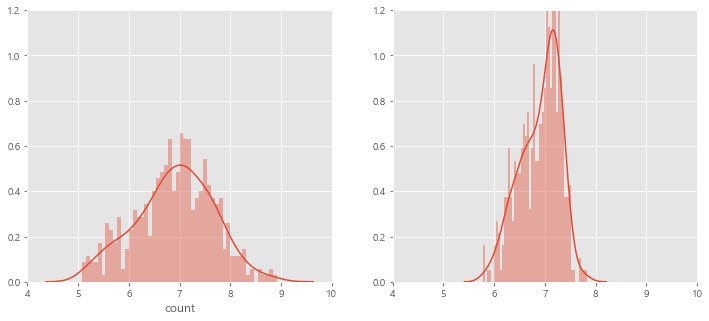

In [412]:
predictions=model.predict(x_test)
fig, (ax1,ax2)=plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sns.distplot(y_test,ax=ax1,bins=50)
ax1.set_xlim(4,10)
ax1.set_ylim(0,1.2)
sns.distplot(predictions,ax=ax2,bins=50)
ax2.set_xlim(4,10)
ax2.set_ylim(0,1.2)

In [413]:
pred=pd.DataFrame(predictions,columns=['pred'])
t=pd.DataFrame(y_test).reset_index(drop=True)
p=pd.concat([t,pred],axis=1)

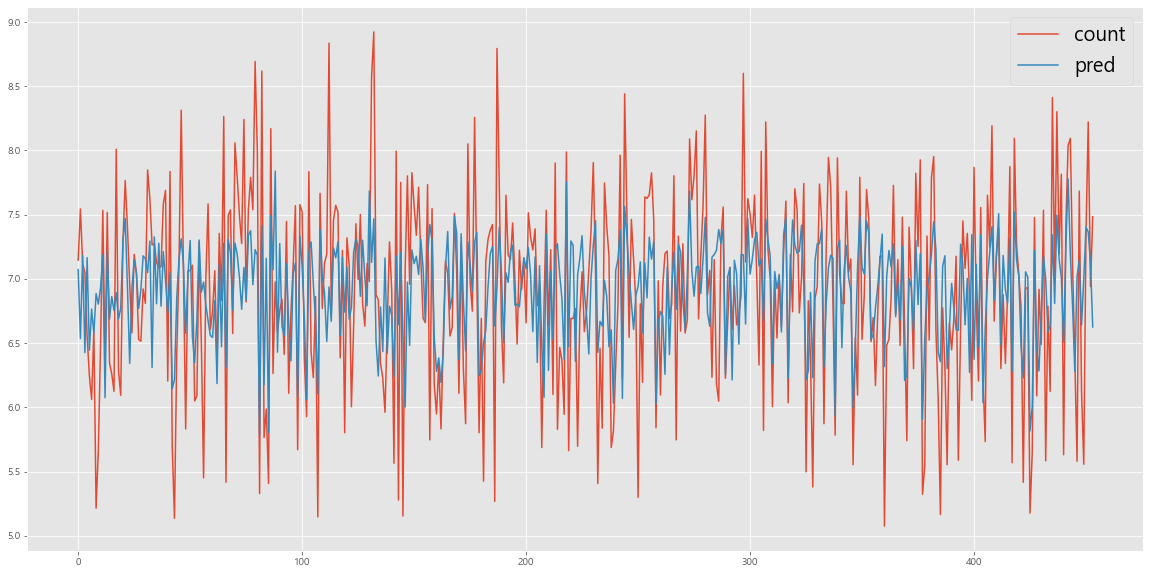

In [414]:
fig,ax=plt.subplots(1)
fig.set_size_inches(20,10)
p.plot(ax=ax)
ax.legend(fontsize=20)
plt.show()

# XGBOOST

In [225]:
from sklearn.model_selection import KFold
import xgboost as xgb
from sklearn.model_selection import cross_val_score
xgb.XGBRegressor()

XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None)

In [416]:
rental_data['starbucks']=rental_data['starbucks'].astype('int')
rental_data['PB']=rental_data['PB'].astype('int')
rental_data['상업지역']=rental_data['상업지역'].astype('int')

In [417]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(rental_data, test_size=0.3, random_state=0)
train.shape, test.shape

((1059, 22), (454, 22))

In [418]:
x_train=train.drop('count',axis=1)
y_train=train['count']
x_test=test.drop('count',axis=1)
y_test=test['count']

## 1차 파라미터 조정

### K-Fold Validation
* 셔플 5회

In [421]:
num_epoch = 500
xgt_hyperparameters_list = []
for epoch in range(num_epoch):
    n_estimators = np.random.randint(low=100, high=1000) # 트리의 갯수
    max_depth = np.random.randint(low=8, high=80) # 최대 깊이
    learning_rate = 10 ** -np.random.uniform(low=0, high=3)
    subsample = np.random.uniform(low=0.1, high=1.0) # 각 트리마다의 관측 데이터 샘플링 비율
    colsample_bytree = np.random.uniform(low=0.4, high=1.0) # 트리 생성할 때 변수를 샘플링해주는 비율
    colsample_bylevel = np.random.uniform(low=0.4, high=1.0) # 트리의 레벨별로 훈련데이터의 변수 샘플링해주는 비율
    model = xgb.XGBRegressor(booster='dart',
                             n_estimators=n_estimators,
                             max_depth=max_depth,
                             learning_rate=learning_rate,
                             subsample=subsample,
                             colsample_bylevel=colsample_bylevel,
                             colsample_bytree=colsample_bytree,
                             random_state=0,
                             seed=0,
                             nthread = 8) # 병렬 스레드 수
                             #tree_method = 'gpu_hist')
    k_fold = KFold(5, shuffle=True, random_state=0)
    score = cross_val_score(model, x_train, y_train, cv=k_fold, scoring=rmsle_scorer).mean()
    hyperparameters = {'epoch': epoch,'score': score,
                       'n_estimators': n_estimators,
                       'max_depth': max_depth,
                       'learning_rate': learning_rate,
                       'subsample': subsample,
                       'colsample_bylevel': colsample_bylevel,
                       'colsample_bytree': colsample_bytree}
    xgt_hyperparameters_list.append(hyperparameters)
    model.fit(x_train,y_train)
    success=0
    fail=0
    pred=model.predict(x_test)
    t=list(y_test)
    for p in range(len(pred)):
        if abs(pred[p]-t[p])<=0.4:
            success+=1
        else:
            fail+=1
    acc=success/(success+fail)*100
    print(f"{epoch:2} n_estimators = {n_estimators}, max_depth = {max_depth:2},learning_rate = {learning_rate:.10f}, subsample = {subsample:.6f}, colsample_bylevel = {colsample_bylevel:.6f}, colsample_bytree = {colsample_bytree:.6f}, Score = {score:.5f},model_score = {model.score(x_test,y_test):.7f},accuary={acc:.7f}")

xgt_hyperparameters_df = pd.DataFrame.from_dict(xgt_hyperparameters_list)

xgt_hyperparameters_df = xgt_hyperparameters_df.sort_values(by="score")
print(xgt_hyperparameters_df.shape)
xgt_hyperparameters_df.head(10)

 0 n_estimators = 676, max_depth = 79,learning_rate = 0.2999022190, subsample = 0.985130, colsample_bylevel = 0.825418, colsample_bytree = 0.931040, Score = 0.08751,model_score = 0.2152422,accuary=43.8325991
 1 n_estimators = 489, max_depth = 36,learning_rate = 0.0017483255, subsample = 0.805971, colsample_bylevel = 0.438880, colsample_bytree = 0.632726, Score = 0.42943,model_score = -12.6149220,accuary=0.0000000
 2 n_estimators = 808, max_depth = 29,learning_rate = 0.0021199773, subsample = 0.532599, colsample_bylevel = 0.805099, colsample_bytree = 0.889824, Score = 0.18218,model_score = -2.1323896,accuary=11.0132159
 3 n_estimators = 816, max_depth = 40,learning_rate = 0.0163058227, subsample = 0.272855, colsample_bylevel = 0.761605, colsample_bytree = 0.558372, Score = 0.08335,model_score = 0.3871106,accuary=49.3392070
 4 n_estimators = 565, max_depth =  8,learning_rate = 0.1287462030, subsample = 0.302061, colsample_bylevel = 0.948484, colsample_bytree = 0.987409, Score = 0.09113,m

40 n_estimators = 365, max_depth =  8,learning_rate = 0.0272049373, subsample = 0.594936, colsample_bylevel = 0.820951, colsample_bytree = 0.604403, Score = 0.08239,model_score = 0.3861044,accuary=49.3392070
41 n_estimators = 168, max_depth = 36,learning_rate = 0.0233059777, subsample = 0.236197, colsample_bylevel = 0.795151, colsample_bytree = 0.999623, Score = 0.08725,model_score = 0.3218367,accuary=46.9162996
42 n_estimators = 465, max_depth = 79,learning_rate = 0.5805663569, subsample = 0.722844, colsample_bylevel = 0.956033, colsample_bytree = 0.576413, Score = 0.10380,model_score = -0.0735992,accuary=42.2907489
43 n_estimators = 548, max_depth = 34,learning_rate = 0.0040212268, subsample = 0.106159, colsample_bylevel = 0.556109, colsample_bytree = 0.672521, Score = 0.13444,model_score = -0.7570821,accuary=23.1277533
44 n_estimators = 875, max_depth = 56,learning_rate = 0.0181663287, subsample = 0.229852, colsample_bylevel = 0.987060, colsample_bytree = 0.900045, Score = 0.08285,m

80 n_estimators = 378, max_depth = 26,learning_rate = 0.3010933272, subsample = 0.177500, colsample_bylevel = 0.493475, colsample_bytree = 0.797666, Score = 0.13077,model_score = -0.8418062,accuary=30.1762115
81 n_estimators = 545, max_depth = 21,learning_rate = 0.0010118060, subsample = 0.387675, colsample_bylevel = 0.701089, colsample_bytree = 0.653216, Score = 0.63394,model_score = -23.3802545,accuary=0.0000000
82 n_estimators = 798, max_depth = 52,learning_rate = 0.2816000083, subsample = 0.384704, colsample_bylevel = 0.899296, colsample_bytree = 0.980805, Score = 0.09684,model_score = 0.0779065,accuary=42.0704846
83 n_estimators = 479, max_depth = 12,learning_rate = 0.0847581027, subsample = 0.294898, colsample_bylevel = 0.897724, colsample_bytree = 0.549693, Score = 0.08771,model_score = 0.2894805,accuary=45.1541850
84 n_estimators = 216, max_depth = 63,learning_rate = 0.0196340426, subsample = 0.673425, colsample_bylevel = 0.878430, colsample_bytree = 0.447125, Score = 0.08434,m

120 n_estimators = 126, max_depth = 64,learning_rate = 0.0272629296, subsample = 0.501799, colsample_bylevel = 0.420109, colsample_bytree = 0.671290, Score = 0.08886,model_score = 0.2481219,accuary=42.2907489
121 n_estimators = 653, max_depth = 78,learning_rate = 0.4600087513, subsample = 0.491830, colsample_bylevel = 0.842186, colsample_bytree = 0.674015, Score = 0.10950,model_score = -0.0535076,accuary=43.6123348
122 n_estimators = 716, max_depth = 71,learning_rate = 0.0029664026, subsample = 0.702290, colsample_bylevel = 0.596322, colsample_bytree = 0.858931, Score = 0.13581,model_score = -0.8057080,accuary=22.2466960
123 n_estimators = 699, max_depth = 78,learning_rate = 0.0015608000, subsample = 0.254266, colsample_bylevel = 0.527681, colsample_bytree = 0.476866, Score = 0.32972,model_score = -7.8555015,accuary=0.0000000
124 n_estimators = 727, max_depth = 75,learning_rate = 0.0140199978, subsample = 0.916341, colsample_bylevel = 0.811632, colsample_bytree = 0.908927, Score = 0.08

160 n_estimators = 683, max_depth = 71,learning_rate = 0.4820376074, subsample = 0.506078, colsample_bylevel = 0.960437, colsample_bytree = 0.627267, Score = 0.10515,model_score = -0.0030467,accuary=41.8502203
161 n_estimators = 228, max_depth = 40,learning_rate = 0.3337301143, subsample = 0.381445, colsample_bylevel = 0.940548, colsample_bytree = 0.964954, Score = 0.10250,model_score = 0.0250536,accuary=40.9691630
162 n_estimators = 739, max_depth = 47,learning_rate = 0.0018724500, subsample = 0.114611, colsample_bylevel = 0.427491, colsample_bytree = 0.884681, Score = 0.24829,model_score = -4.4279702,accuary=4.4052863
163 n_estimators = 158, max_depth = 20,learning_rate = 0.2579791629, subsample = 0.940811, colsample_bylevel = 0.722291, colsample_bytree = 0.601480, Score = 0.08839,model_score = 0.2436953,accuary=44.2731278
164 n_estimators = 741, max_depth =  8,learning_rate = 0.0127400368, subsample = 0.244666, colsample_bylevel = 0.870813, colsample_bytree = 0.505140, Score = 0.082

200 n_estimators = 965, max_depth = 25,learning_rate = 0.0437369956, subsample = 0.475505, colsample_bylevel = 0.861935, colsample_bytree = 0.720389, Score = 0.08343,model_score = 0.3710876,accuary=48.2378855
201 n_estimators = 304, max_depth = 12,learning_rate = 0.1258806201, subsample = 0.926474, colsample_bylevel = 0.433228, colsample_bytree = 0.486420, Score = 0.08471,model_score = 0.3625225,accuary=49.3392070
202 n_estimators = 779, max_depth = 48,learning_rate = 0.8244795709, subsample = 0.709752, colsample_bylevel = 0.611539, colsample_bytree = 0.771367, Score = 0.12270,model_score = -0.1299463,accuary=40.9691630
203 n_estimators = 798, max_depth = 36,learning_rate = 0.0258669833, subsample = 0.535971, colsample_bylevel = 0.907331, colsample_bytree = 0.666842, Score = 0.08218,model_score = 0.3862142,accuary=49.5594714
204 n_estimators = 647, max_depth = 52,learning_rate = 0.0015486390, subsample = 0.369563, colsample_bylevel = 0.540164, colsample_bytree = 0.536101, Score = 0.363

240 n_estimators = 552, max_depth = 74,learning_rate = 0.0019356442, subsample = 0.465962, colsample_bylevel = 0.978245, colsample_bytree = 0.909560, Score = 0.33722,model_score = -8.1878473,accuary=0.0000000
241 n_estimators = 138, max_depth = 55,learning_rate = 0.4042380232, subsample = 0.847684, colsample_bylevel = 0.509633, colsample_bytree = 0.919260, Score = 0.09308,model_score = 0.2633473,accuary=46.6960352
242 n_estimators = 709, max_depth = 62,learning_rate = 0.2093705184, subsample = 0.474080, colsample_bylevel = 0.732700, colsample_bytree = 0.616218, Score = 0.09166,model_score = 0.2442303,accuary=42.0704846
243 n_estimators = 314, max_depth = 66,learning_rate = 0.3583785161, subsample = 0.704729, colsample_bylevel = 0.823547, colsample_bytree = 0.638906, Score = 0.09483,model_score = 0.1903697,accuary=43.3920705
244 n_estimators = 193, max_depth = 62,learning_rate = 0.0016895685, subsample = 0.822678, colsample_bylevel = 0.666420, colsample_bytree = 0.968049, Score = 0.8814

280 n_estimators = 637, max_depth = 37,learning_rate = 0.0022701918, subsample = 0.928821, colsample_bylevel = 0.908027, colsample_bytree = 0.416024, Score = 0.22768,model_score = -3.7156348,accuary=5.5066079
281 n_estimators = 974, max_depth = 53,learning_rate = 0.0150777300, subsample = 0.421209, colsample_bylevel = 0.410385, colsample_bytree = 0.600249, Score = 0.08209,model_score = 0.4039872,accuary=48.2378855
282 n_estimators = 808, max_depth = 16,learning_rate = 0.0036705681, subsample = 0.714966, colsample_bylevel = 0.982768, colsample_bytree = 0.999884, Score = 0.09679,model_score = 0.1007361,accuary=37.8854626
283 n_estimators = 845, max_depth = 47,learning_rate = 0.7005141701, subsample = 0.573605, colsample_bylevel = 0.802947, colsample_bytree = 0.728648, Score = 0.11795,model_score = -0.1850369,accuary=37.4449339
284 n_estimators = 550, max_depth = 45,learning_rate = 0.4182865728, subsample = 0.229719, colsample_bylevel = 0.515751, colsample_bytree = 0.593546, Score = 0.146

320 n_estimators = 638, max_depth = 38,learning_rate = 0.0267806285, subsample = 0.379811, colsample_bylevel = 0.568251, colsample_bytree = 0.735218, Score = 0.08343,model_score = 0.3647476,accuary=48.8986784
321 n_estimators = 682, max_depth = 16,learning_rate = 0.0028413182, subsample = 0.140307, colsample_bylevel = 0.566321, colsample_bytree = 0.410773, Score = 0.15642,model_score = -1.3652787,accuary=17.6211454
322 n_estimators = 249, max_depth = 10,learning_rate = 0.2565851501, subsample = 0.982235, colsample_bylevel = 0.608490, colsample_bytree = 0.677191, Score = 0.08810,model_score = 0.3092792,accuary=48.4581498
323 n_estimators = 537, max_depth = 59,learning_rate = 0.0505602067, subsample = 0.900318, colsample_bylevel = 0.595535, colsample_bytree = 0.624779, Score = 0.08298,model_score = 0.3655104,accuary=47.3568282
324 n_estimators = 219, max_depth = 54,learning_rate = 0.0011531088, subsample = 0.472630, colsample_bylevel = 0.912285, colsample_bytree = 0.806516, Score = 0.995

359 n_estimators = 463, max_depth =  8,learning_rate = 0.0388294911, subsample = 0.703831, colsample_bylevel = 0.415285, colsample_bytree = 0.734787, Score = 0.08302,model_score = 0.3912651,accuary=50.2202643
360 n_estimators = 909, max_depth = 21,learning_rate = 0.0691848777, subsample = 0.366995, colsample_bylevel = 0.463329, colsample_bytree = 0.447144, Score = 0.08435,model_score = 0.3317189,accuary=48.8986784
361 n_estimators = 248, max_depth = 70,learning_rate = 0.0055665805, subsample = 0.168311, colsample_bylevel = 0.609872, colsample_bytree = 0.794875, Score = 0.24659,model_score = -4.3966266,accuary=3.9647577
362 n_estimators = 150, max_depth = 15,learning_rate = 0.2420219347, subsample = 0.622151, colsample_bylevel = 0.481294, colsample_bytree = 0.425771, Score = 0.09236,model_score = 0.2746771,accuary=42.5110132
363 n_estimators = 613, max_depth = 77,learning_rate = 0.3197325268, subsample = 0.134123, colsample_bylevel = 0.756984, colsample_bytree = 0.728108, Score = 0.2066

399 n_estimators = 695, max_depth = 42,learning_rate = 0.8839563522, subsample = 0.543280, colsample_bylevel = 0.550425, colsample_bytree = 0.639825, Score = 0.13692,model_score = -0.5353490,accuary=34.5814978
400 n_estimators = 285, max_depth = 61,learning_rate = 0.0108905075, subsample = 0.561299, colsample_bylevel = 0.586933, colsample_bytree = 0.907962, Score = 0.09405,model_score = 0.1621239,accuary=39.4273128
401 n_estimators = 888, max_depth = 25,learning_rate = 0.0471889950, subsample = 0.405265, colsample_bylevel = 0.663148, colsample_bytree = 0.538114, Score = 0.08394,model_score = 0.3596719,accuary=49.5594714
402 n_estimators = 727, max_depth = 57,learning_rate = 0.0080114677, subsample = 0.280971, colsample_bylevel = 0.646477, colsample_bytree = 0.488694, Score = 0.08292,model_score = 0.3847063,accuary=48.0176211
403 n_estimators = 722, max_depth = 19,learning_rate = 0.0017205136, subsample = 0.243013, colsample_bylevel = 0.421782, colsample_bytree = 0.661388, Score = 0.281

439 n_estimators = 479, max_depth = 17,learning_rate = 0.1779519191, subsample = 0.669034, colsample_bylevel = 0.993372, colsample_bytree = 0.769718, Score = 0.08863,model_score = 0.2792093,accuary=51.7621145
440 n_estimators = 782, max_depth = 69,learning_rate = 0.8947250687, subsample = 0.426579, colsample_bylevel = 0.686435, colsample_bytree = 0.450914, Score = 0.18394,model_score = -2.0732877,accuary=21.3656388
441 n_estimators = 460, max_depth = 65,learning_rate = 0.3174779335, subsample = 0.216836, colsample_bylevel = 0.465650, colsample_bytree = 0.979281, Score = 0.11746,model_score = -0.4194474,accuary=36.7841410
442 n_estimators = 774, max_depth = 76,learning_rate = 0.2965635875, subsample = 0.846825, colsample_bylevel = 0.833786, colsample_bytree = 0.568423, Score = 0.09077,model_score = 0.2362045,accuary=44.9339207
443 n_estimators = 813, max_depth = 57,learning_rate = 0.1096097283, subsample = 0.302123, colsample_bylevel = 0.546919, colsample_bytree = 0.664861, Score = 0.08

479 n_estimators = 134, max_depth = 71,learning_rate = 0.0014792440, subsample = 0.664330, colsample_bylevel = 0.828268, colsample_bytree = 0.567946, Score = 1.09445,model_score = -47.5620241,accuary=0.0000000
480 n_estimators = 665, max_depth =  8,learning_rate = 0.0105113772, subsample = 0.335013, colsample_bylevel = 0.606463, colsample_bytree = 0.998802, Score = 0.08231,model_score = 0.3909724,accuary=48.8986784
481 n_estimators = 725, max_depth = 17,learning_rate = 0.0278103413, subsample = 0.957599, colsample_bylevel = 0.400566, colsample_bytree = 0.725064, Score = 0.08279,model_score = 0.3867068,accuary=47.5770925
482 n_estimators = 727, max_depth = 38,learning_rate = 0.4566383780, subsample = 0.677894, colsample_bylevel = 0.710669, colsample_bytree = 0.851138, Score = 0.09763,model_score = 0.0240932,accuary=44.0528634
483 n_estimators = 170, max_depth = 25,learning_rate = 0.1571196155, subsample = 0.671622, colsample_bylevel = 0.726404, colsample_bytree = 0.567112, Score = 0.087

,epoch,score,n_estimators,max_depth,learning_rate,subsample,colsample_bylevel,colsample_bytree
212,212,0.081834,858,8,0.011657,0.570679,0.910096,0.637541
15,15,0.081969,780,46,0.006986,0.830024,0.405978,0.642187
325,325,0.082053,927,17,0.008198,0.890977,0.401465,0.521863
469,469,0.082076,614,42,0.011237,0.278583,0.535078,0.565570
281,281,0.082091,974,53,0.015078,0.421209,0.410385,0.600249
273,273,0.082100,953,28,0.008173,0.482827,0.618742,0.961956
372,372,0.082109,281,17,0.034912,0.887518,0.748696,0.761818
303,303,0.082132,470,12,0.015461,0.315712,0.735838,0.649910
309,309,0.082145,640,15,0.011777,0.842932,0.518054,0.485942
368,368,0.082149,710,58,0.017552,0.511202,0.876390,0.637469


In [432]:
xgt_hyperparameters_df.head(50)

,epoch,score,n_estimators,max_depth,learning_rate,subsample,colsample_bylevel,colsample_bytree
212,212,0.081834,858,8,0.011657,0.570679,0.910096,0.637541
15,15,0.081969,780,46,0.006986,0.830024,0.405978,0.642187
325,325,0.082053,927,17,0.008198,0.890977,0.401465,0.521863
469,469,0.082076,614,42,0.011237,0.278583,0.535078,0.565570
281,281,0.082091,974,53,0.015078,0.421209,0.410385,0.600249
273,273,0.082100,953,28,0.008173,0.482827,0.618742,0.961956
372,372,0.082109,281,17,0.034912,0.887518,0.748696,0.761818
303,303,0.082132,470,12,0.015461,0.315712,0.735838,0.649910
309,309,0.082145,640,15,0.011777,0.842932,0.518054,0.485942
368,368,0.082149,710,58,0.017552,0.511202,0.876390,0.637469


## 2차 하이퍼 파라미터 조정
* 1차 조정 결과를 바탕으로 2차 조정

In [423]:
num_epoch = 300
fin_xgt_hyperparameters_list = []
for epoch in range(num_epoch):
    n_estimators = np.random.randint(low=300, high=900) # 트리의 갯수
    max_depth = np.random.randint(low=30, high=80) # 최대 깊이
    learning_rate = 10 ** -np.random.uniform(low=2, high=3)
    subsample = np.random.uniform(low=0.3, high=1.0) # 각 트리마다의 관측 데이터 샘플링 비율
    colsample_bytree = np.random.uniform(low=0.4, high=1.0) # 트리 생성할 때 변수를 샘플링해주는 비율
    colsample_bylevel = np.random.uniform(low=0.4, high=1.0) # 트리의 레벨별로 훈련데이터의 변수 샘플링해주는 비율
    model = xgb.XGBRegressor(booster='dart',
                             n_estimators=n_estimators,
                             max_depth=max_depth,
                             learning_rate=learning_rate,
                             subsample=subsample,
                             colsample_bylevel=colsample_bylevel,
                             colsample_bytree=colsample_bytree,
                             random_state=0,
                             seed=0,
                             nthread = 8) # 병렬 스레드 수
                             #tree_method = 'gpu_hist')
    k_fold = KFold(5, shuffle=True, random_state=0)
    score = cross_val_score(model, x_train, y_train, cv=k_fold, scoring=rmsle_scorer).mean()
    model.fit(x_train,y_train)
    success=0
    fail=0
    pred=model.predict(x_test)
    t=list(y_test)
    for p in range(len(pred)):
        if abs(pred[p]-t[p])<=0.4:
            success+=1
        else:
            fail+=1
    acc=success/(success+fail)*100
    hyperparameters = {'epoch': epoch,'score': score,
                       'n_estimators': n_estimators,
                       'max_depth': max_depth,
                       'learning_rate': learning_rate,
                       'subsample': subsample,
                       'colsample_bylevel': colsample_bylevel,
                       'colsample_bytree': colsample_bytree,
                      'accuracy':acc}
    fin_xgt_hyperparameters_list.append(hyperparameters)

    print(f"{epoch:2} n_estimators = {n_estimators}, max_depth = {max_depth:2},learning_rate = {learning_rate:.10f}, subsample = {subsample:.6f}, colsample_bylevel = {colsample_bylevel:.6f}, colsample_bytree = {colsample_bytree:.6f}, Score = {score:.5f},model_score = {model.score(x_test,y_test):.7f},accuary={acc:.7f}")

fin_xgt_hyperparameters_df = pd.DataFrame.from_dict(fin_xgt_hyperparameters_list)

fin_xgt_hyperparameters_df = fin_xgt_hyperparameters_df.sort_values(by="score")
print(fin_xgt_hyperparameters_df.shape)
fin_xgt_hyperparameters_df.head(10)

 0 n_estimators = 314, max_depth = 46,learning_rate = 0.0050338924, subsample = 0.553393, colsample_bylevel = 0.976400, colsample_bytree = 0.406598, Score = 0.20202,model_score = -2.8072055,accuary=9.2511013
 1 n_estimators = 459, max_depth = 48,learning_rate = 0.0065780835, subsample = 0.330433, colsample_bylevel = 0.597034, colsample_bytree = 0.535754, Score = 0.09606,model_score = 0.1044444,accuary=37.0044053
 2 n_estimators = 582, max_depth = 33,learning_rate = 0.0032553776, subsample = 0.640671, colsample_bylevel = 0.700327, colsample_bytree = 0.646822, Score = 0.15750,model_score = -1.4118099,accuary=14.3171806
 3 n_estimators = 812, max_depth = 58,learning_rate = 0.0022007085, subsample = 0.823815, colsample_bylevel = 0.945249, colsample_bytree = 0.731236, Score = 0.17058,model_score = -1.7916243,accuary=12.9955947
 4 n_estimators = 323, max_depth = 44,learning_rate = 0.0030554609, subsample = 0.596791, colsample_bylevel = 0.682328, colsample_bytree = 0.846417, Score = 0.36829,m

40 n_estimators = 429, max_depth = 39,learning_rate = 0.0015129294, subsample = 0.793416, colsample_bylevel = 0.528856, colsample_bytree = 0.422134, Score = 0.55539,model_score = -19.1580723,accuary=0.0000000
41 n_estimators = 669, max_depth = 72,learning_rate = 0.0016669529, subsample = 0.337055, colsample_bylevel = 0.727523, colsample_bytree = 0.786005, Score = 0.32105,model_score = -7.4677528,accuary=0.2202643
42 n_estimators = 478, max_depth = 79,learning_rate = 0.0032179026, subsample = 0.339643, colsample_bylevel = 0.971215, colsample_bytree = 0.507198, Score = 0.21110,model_score = -3.1135490,accuary=8.8105727
43 n_estimators = 670, max_depth = 48,learning_rate = 0.0011770501, subsample = 0.323407, colsample_bylevel = 0.903226, colsample_bytree = 0.818686, Score = 0.46709,model_score = -14.4984401,accuary=0.0000000
44 n_estimators = 307, max_depth = 45,learning_rate = 0.0086292152, subsample = 0.494934, colsample_bylevel = 0.552665, colsample_bytree = 0.958402, Score = 0.10650,m

80 n_estimators = 600, max_depth = 48,learning_rate = 0.0017761644, subsample = 0.922621, colsample_bylevel = 0.902910, colsample_bytree = 0.508691, Score = 0.33660,model_score = -8.1971624,accuary=0.0000000
81 n_estimators = 300, max_depth = 53,learning_rate = 0.0050422712, subsample = 0.989397, colsample_bylevel = 0.930742, colsample_bytree = 0.936925, Score = 0.21421,model_score = -3.2236415,accuary=7.4889868
82 n_estimators = 393, max_depth = 67,learning_rate = 0.0039351735, subsample = 0.481429, colsample_bylevel = 0.470268, colsample_bytree = 0.947701, Score = 0.20885,model_score = -3.0397139,accuary=7.4889868
83 n_estimators = 765, max_depth = 58,learning_rate = 0.0058081082, subsample = 0.674004, colsample_bylevel = 0.691245, colsample_bytree = 0.685715, Score = 0.08305,model_score = 0.3604568,accuary=45.8149780
84 n_estimators = 436, max_depth = 59,learning_rate = 0.0049880355, subsample = 0.396286, colsample_bylevel = 0.468371, colsample_bytree = 0.502813, Score = 0.13161,mod

120 n_estimators = 704, max_depth = 52,learning_rate = 0.0050277357, subsample = 0.647165, colsample_bylevel = 0.988982, colsample_bytree = 0.890836, Score = 0.08788,model_score = 0.2741046,accuary=43.3920705
121 n_estimators = 698, max_depth = 71,learning_rate = 0.0012214711, subsample = 0.870039, colsample_bylevel = 0.614701, colsample_bytree = 0.468673, Score = 0.43060,model_score = -12.6818083,accuary=0.0000000
122 n_estimators = 767, max_depth = 78,learning_rate = 0.0055465508, subsample = 0.926876, colsample_bylevel = 0.478331, colsample_bytree = 0.631130, Score = 0.08370,model_score = 0.3486922,accuary=47.1365639
123 n_estimators = 448, max_depth = 43,learning_rate = 0.0023084448, subsample = 0.562088, colsample_bylevel = 0.423922, colsample_bytree = 0.795374, Score = 0.34927,model_score = -8.7591017,accuary=0.0000000
124 n_estimators = 810, max_depth = 40,learning_rate = 0.0096515866, subsample = 0.577959, colsample_bylevel = 0.609308, colsample_bytree = 0.479516, Score = 0.082

160 n_estimators = 493, max_depth = 31,learning_rate = 0.0033406806, subsample = 0.377551, colsample_bylevel = 0.513200, colsample_bytree = 0.660710, Score = 0.19184,model_score = -2.4717892,accuary=11.0132159
161 n_estimators = 655, max_depth = 49,learning_rate = 0.0012023073, subsample = 0.303386, colsample_bylevel = 0.506805, colsample_bytree = 0.953497, Score = 0.46781,model_score = -14.5351218,accuary=0.0000000
162 n_estimators = 524, max_depth = 67,learning_rate = 0.0021663552, subsample = 0.547589, colsample_bylevel = 0.691265, colsample_bytree = 0.943455, Score = 0.31318,model_score = -7.1335727,accuary=0.2202643
163 n_estimators = 668, max_depth = 44,learning_rate = 0.0075331810, subsample = 0.456807, colsample_bylevel = 0.551965, colsample_bytree = 0.968017, Score = 0.08285,model_score = 0.3734924,accuary=49.1189427
164 n_estimators = 498, max_depth = 74,learning_rate = 0.0049346616, subsample = 0.508074, colsample_bylevel = 0.598825, colsample_bytree = 0.822202, Score = 0.11

200 n_estimators = 823, max_depth = 31,learning_rate = 0.0029701707, subsample = 0.924519, colsample_bylevel = 0.448614, colsample_bytree = 0.944542, Score = 0.11420,model_score = -0.2872018,accuary=29.9559471
201 n_estimators = 701, max_depth = 41,learning_rate = 0.0018687938, subsample = 0.575645, colsample_bylevel = 0.729275, colsample_bytree = 0.834095, Score = 0.26128,model_score = -4.9758238,accuary=2.6431718
202 n_estimators = 510, max_depth = 58,learning_rate = 0.0016985570, subsample = 0.352208, colsample_bylevel = 0.735077, colsample_bytree = 0.792814, Score = 0.42507,model_score = -12.3783568,accuary=0.0000000
203 n_estimators = 864, max_depth = 51,learning_rate = 0.0045639399, subsample = 0.322179, colsample_bylevel = 0.918190, colsample_bytree = 0.692392, Score = 0.08536,model_score = 0.3360867,accuary=46.2555066
204 n_estimators = 438, max_depth = 37,learning_rate = 0.0041032570, subsample = 0.408643, colsample_bylevel = 0.974618, colsample_bytree = 0.567317, Score = 0.17

240 n_estimators = 455, max_depth = 65,learning_rate = 0.0035242611, subsample = 0.529295, colsample_bylevel = 0.867567, colsample_bytree = 0.456357, Score = 0.19828,model_score = -2.6825849,accuary=10.3524229
241 n_estimators = 678, max_depth = 63,learning_rate = 0.0089351416, subsample = 0.786677, colsample_bylevel = 0.415503, colsample_bytree = 0.712994, Score = 0.08205,model_score = 0.3925092,accuary=48.6784141
242 n_estimators = 802, max_depth = 46,learning_rate = 0.0032610829, subsample = 0.982763, colsample_bylevel = 0.639616, colsample_bytree = 0.450802, Score = 0.10642,model_score = -0.1297100,accuary=32.5991189
243 n_estimators = 671, max_depth = 47,learning_rate = 0.0014210200, subsample = 0.696755, colsample_bylevel = 0.564948, colsample_bytree = 0.597350, Score = 0.38262,model_score = -10.3291996,accuary=0.0000000
244 n_estimators = 780, max_depth = 71,learning_rate = 0.0029807291, subsample = 0.321406, colsample_bylevel = 0.724725, colsample_bytree = 0.582305, Score = 0.1

280 n_estimators = 469, max_depth = 63,learning_rate = 0.0010675821, subsample = 0.686252, colsample_bylevel = 0.485480, colsample_bytree = 0.728254, Score = 0.67932,model_score = -25.8705806,accuary=0.0000000
281 n_estimators = 518, max_depth = 67,learning_rate = 0.0042050712, subsample = 0.804746, colsample_bylevel = 0.436696, colsample_bytree = 0.449979, Score = 0.12992,model_score = -0.6941756,accuary=23.3480176
282 n_estimators = 841, max_depth = 52,learning_rate = 0.0012549645, subsample = 0.356918, colsample_bylevel = 0.460344, colsample_bytree = 0.851741, Score = 0.34232,model_score = -8.4257252,accuary=0.0000000
283 n_estimators = 493, max_depth = 55,learning_rate = 0.0015281095, subsample = 0.521338, colsample_bylevel = 0.780600, colsample_bytree = 0.759423, Score = 0.48679,model_score = -15.5297528,accuary=0.0000000
284 n_estimators = 882, max_depth = 73,learning_rate = 0.0045463431, subsample = 0.799697, colsample_bylevel = 0.972359, colsample_bytree = 0.726407, Score = 0.0

,epoch,score,n_estimators,max_depth,learning_rate,subsample,colsample_bylevel,colsample_bytree,accuracy
57,57,0.081878,842,31,0.007050,0.441541,0.665804,0.570083,47.577093
173,173,0.081969,752,61,0.009788,0.575314,0.466636,0.869714,47.356828
241,241,0.082050,678,63,0.008935,0.786677,0.415503,0.712994,48.678414
288,288,0.082118,758,79,0.008966,0.886732,0.530486,0.617327,48.237885
227,227,0.082147,820,61,0.006736,0.393268,0.657148,0.925193,48.237885
101,101,0.082147,691,72,0.008523,0.363190,0.638621,0.719094,48.237885
69,69,0.082169,666,52,0.009375,0.367107,0.558125,0.789531,48.237885
175,175,0.082224,884,61,0.008278,0.510030,0.684098,0.923126,48.458150
171,171,0.082258,664,46,0.009907,0.605835,0.567095,0.663057,48.458150
124,124,0.082323,810,40,0.009652,0.577959,0.609308,0.479516,49.779736


In [433]:
fin_xgt_hyperparameters_df.head(10)

,epoch,score,n_estimators,max_depth,learning_rate,subsample,colsample_bylevel,colsample_bytree,accuracy
245,245,0.881731,317,54,0.001029,0.489017,0.408234,0.585787,0.0
114,114,0.856427,326,52,0.001056,0.958695,0.481584,0.913151,0.0
133,133,0.831393,331,31,0.001099,0.653139,0.694160,0.950348,0.0
68,68,0.766318,315,51,0.001324,0.936954,0.963124,0.418483,0.0
145,145,0.716815,371,34,0.001248,0.657917,0.767632,0.555200,0.0
238,238,0.697749,347,79,0.001389,0.599767,0.885053,0.973951,0.0
153,153,0.693456,324,60,0.001500,0.713135,0.984957,0.473244,0.0
39,39,0.689409,378,75,0.001297,0.590296,0.567504,0.665282,0.0
280,280,0.679319,469,63,0.001068,0.686252,0.485480,0.728254,0.0
33,33,0.673754,344,33,0.001473,0.535596,0.671857,0.652430,0.0


## XGBOOST 최적 모델

In [434]:
xgt_hyperparameters_df.loc[212]

epoch                212.000000
score                  0.081834
n_estimators         858.000000
max_depth              8.000000
learning_rate          0.011657
subsample              0.570679
colsample_bylevel      0.910096
colsample_bytree       0.637541
Name: 212, dtype: float64

In [435]:
model = xgb.XGBRegressor(booster='dart',
                         n_estimators=int(xgt_hyperparameters_df.loc[212]['n_estimators']),
                         max_depth=int(xgt_hyperparameters_df.loc[212]['max_depth']),
                         learning_rate=xgt_hyperparameters_df.loc[212]['learning_rate'],
                         subsample=xgt_hyperparameters_df.loc[212]['subsample'],
                         colsample_bylevel=xgt_hyperparameters_df.loc[212]['colsample_bylevel'],
                         colsample_bytree=xgt_hyperparameters_df.loc[212]['colsample_bytree'],
                         random_state=0,
                         seed=0,
                         nthread = 8) # 병렬 스레드 수
                         #tree_method = 'gpu_hist')
k_fold = KFold(5, shuffle=True, random_state=0)
score = cross_val_score(model, x_train, y_train, cv=k_fold, scoring=rmsle_scorer).mean()
model.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='dart',
             colsample_bylevel=0.9100957959535725, colsample_bynode=1,
             colsample_bytree=0.6375405661807572, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01165707716340099, max_delta_step=0, max_depth=8,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=858, n_jobs=8, nthread=8, num_parallel_tree=1,
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=0, subsample=0.5706793960856646, tree_method='exact',
             validate_parameters=1, verbosity=None)

### RMSE SCORE

In [436]:
score

0.08183435571980698

### R-Squared

In [437]:
model.score(x_test,y_test)

0.4023765422757639

(0.0, 1.2)

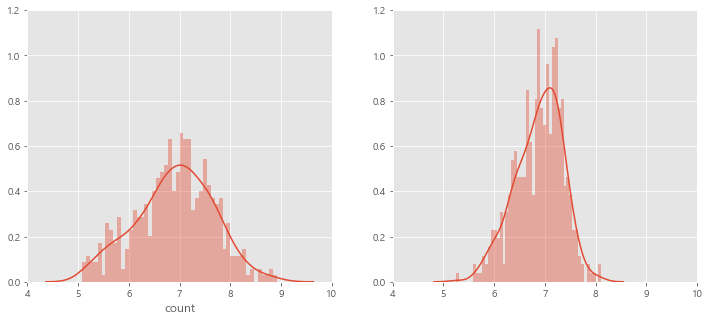

In [438]:
predictions=model.predict(x_test)
fig, (ax1,ax2)=plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sns.distplot(y_test,ax=ax1,bins=50)
ax1.set_xlim(4,10)
ax1.set_ylim(0,1.2)
sns.distplot(predictions,ax=ax2,bins=50)
ax2.set_xlim(4,10)
ax2.set_ylim(0,1.2)

In [440]:
pred=pd.DataFrame(predictions,columns=['pred'])
t=pd.DataFrame(y_test).reset_index(drop=True)
p=pd.concat([t,pred],axis=1)

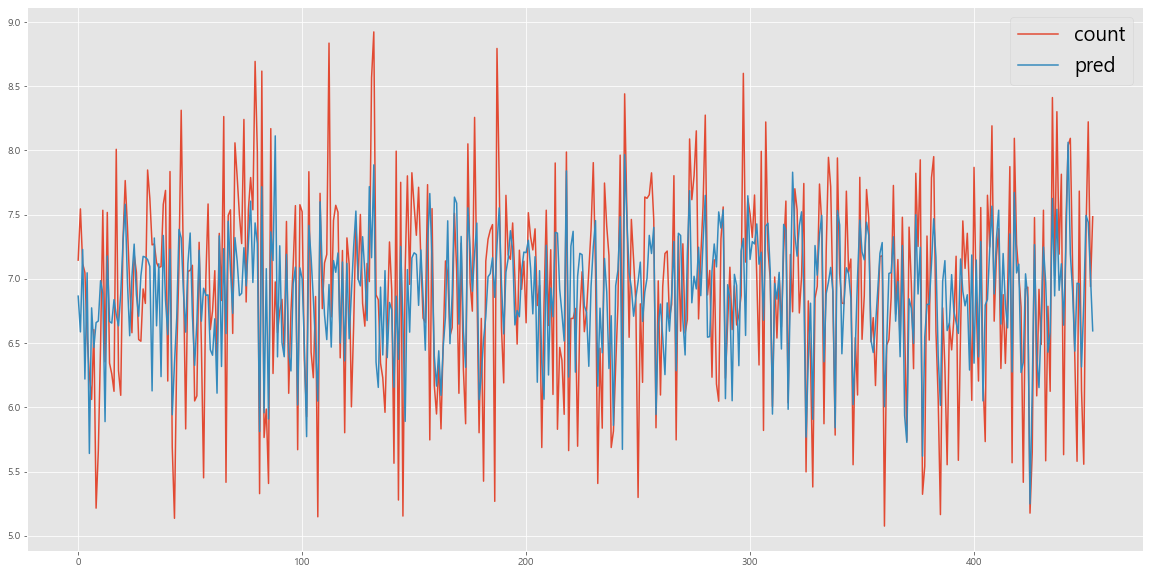

In [441]:
fig,ax=plt.subplots(1)
fig.set_size_inches(20,10)
p.plot(ax=ax)
ax.legend(fontsize=20)
plt.show()

# 격자 데이터 적용
* 50 x 50(m) 격자 데이터에 모델 적용
* 지역별 대여량 예측

In [452]:
grid_data=pd.read_csv('C:/Users/user/Desktop/서울시청/데이터/독립변수/test1222 최종격자.csv',encoding='cp949')

In [454]:
grid=grid_data['id']

In [455]:
grid_data=grid_data[[ 'subway',  '상업지역', 'weighted_LEN_mean', 'mean_width',
       '주거', 'school', 'sports', 'study', 'market', 'game', 
       'culture',  'parking', 'bike','bus_all', 'sub_all',
         '용적율', '지상층수', '대지면적', '인구','starbucks','PB']]

In [456]:
grid_data['starbucks']=grid_data['starbucks'].astype('int')
grid_data['PB']=grid_data['PB'].astype('int')
grid_data['상업지역']=grid_data['상업지역'].astype('int')

In [457]:
grid_data

,subway,상업지역,weighted_LEN_mean,mean_width,주거,school,sports,study,market,game,...,parking,bike,bus_all,sub_all,용적율,지상층수,대지면적,인구,starbucks,PB
0,18.507655,0,0.862636,6.745369,0.000000,28.377691,21.144173,5.909159,5.889715,6.205061,...,30.511870,12.633085,0.0,13.160083,0.000000,0.0,0.000000,0.0,0,0
1,19.797353,0,0.905400,6.745369,0.000000,29.205606,21.855557,6.020991,5.971249,6.258142,...,30.081118,14.180187,0.0,13.160083,0.000000,0.0,0.000000,0.0,0,0
2,21.010698,0,0.905400,6.745369,0.000000,30.014710,22.612031,6.124400,6.055224,6.314351,...,29.678765,15.675194,0.0,13.160083,0.000000,0.0,0.000000,0.0,0,0
3,22.159468,0,0.905400,6.745369,0.000000,30.805890,23.397220,6.219996,6.138829,6.372197,...,29.308927,16.640326,0.0,13.160083,0.000000,0.0,0.000000,0.0,0,0
4,23.252772,0,1.064580,6.745369,0.000000,31.580026,24.198824,6.308539,6.220382,6.430548,...,28.975848,17.109340,0.0,13.160083,0.000000,0.0,0.000000,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250883,10.149705,0,1.442799,4.080160,1923.413574,23.929978,19.102101,5.001104,5.001104,6.040805,...,32.965716,12.620092,0.0,13.160083,5.461685,2.0,5.398163,0.0,0,0
250884,12.178168,0,1.904764,4.080160,0.000000,24.862074,19.222402,5.268699,5.268699,6.064571,...,32.445376,11.144621,0.0,13.160083,5.461685,2.0,5.398163,0.0,0,0
250885,13.994736,0,1.315713,6.904105,0.000000,25.772795,19.510338,5.486712,5.486712,6.084550,...,31.937014,10.114744,0.0,13.160083,0.000000,0.0,0.000000,0.0,0,0
250886,15.631349,0,0.329178,6.904105,0.000000,26.662011,19.944877,5.661016,5.668623,6.116042,...,31.443274,10.119795,0.0,13.160083,0.000000,0.0,0.000000,0.0,0,0


### 격자별 예측값

In [473]:
val_data=model.predict(grid_data)

In [474]:
len(val_data)

250888

* 격자 id와 결합

In [475]:
val_df=pd.DataFrame(val_data,columns=['pred'])
val_df['id']=grid
val_df.head()

,pred,id
0,7.441823,262147
1,7.324186,262148
2,7.188477,262149
3,7.076603,262150
4,7.021105,262151


* 예측된 대여량을 기준으로 내림차순

In [476]:
val_df=val_df.sort_values(by='pred',ascending=False).reset_index(drop=True)

In [478]:
val_df.head()

,pred,id
0,8.905192,287094
1,8.563205,279903
2,8.506216,310426
3,8.463010,309681
4,8.449931,236556


### 위치 데이터 결합
* 격자 id별 위도, 경도 데이터 결합

In [479]:
location=pd.read_csv('C:/Users/user/Desktop/서울시청/데이터/격자/centroid격자50_4326.csv',encoding='cp949')

In [480]:
location=location[['id','y','x']]
location.columns=['id','위도','경도']

In [482]:
location.head()

,id,위도,경도
0,262147,37.543061,127.110310
1,262148,37.543063,127.110876
2,262149,37.543065,127.111442
3,262150,37.543067,127.112008
4,262151,37.543069,127.112574


In [483]:
val_df=val_df.merge(location,on='id')

In [484]:
val_df.head()

,pred,id,위도,경도
0,8.905192,287094,37.527016,126.932144
1,8.563205,279903,37.532095,127.067358
2,8.506216,310426,37.513737,127.101410
3,8.463010,309681,37.514184,127.100276
4,8.449931,236556,37.557622,126.923986


# 최종 결과

* 전체 결과

In [485]:
val_df.to_csv('C:/Users/user/Desktop/서울시청/데이터/val/최종결과.csv',encoding='cp949',index=False)

* 상위 10000개

In [486]:
val_df.loc[:9999].to_csv('C:/Users/user/Desktop/서울시청/데이터/val/최종결과 상위10000.csv',encoding='cp949',index=False)